,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


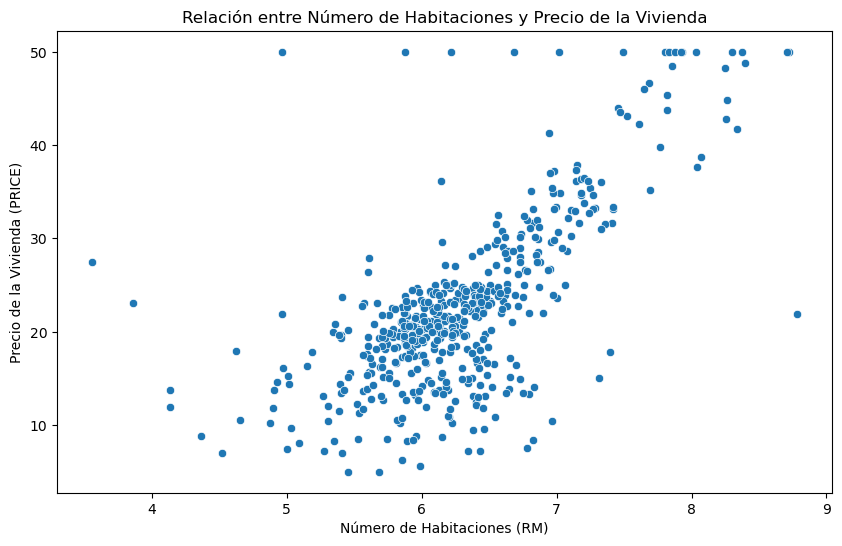

Mean Squared Error (MSE): 24.29
Mean Absolute Error (MAE): 3.19
R² Score: 0.67


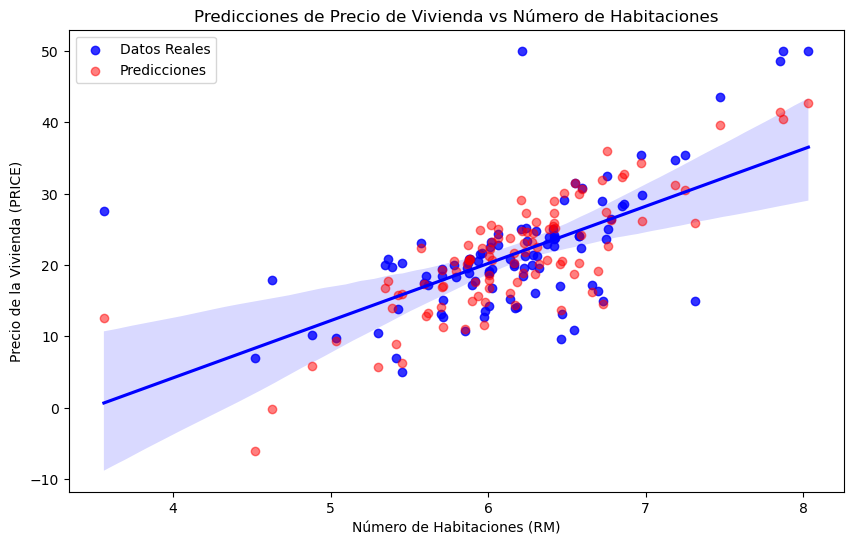

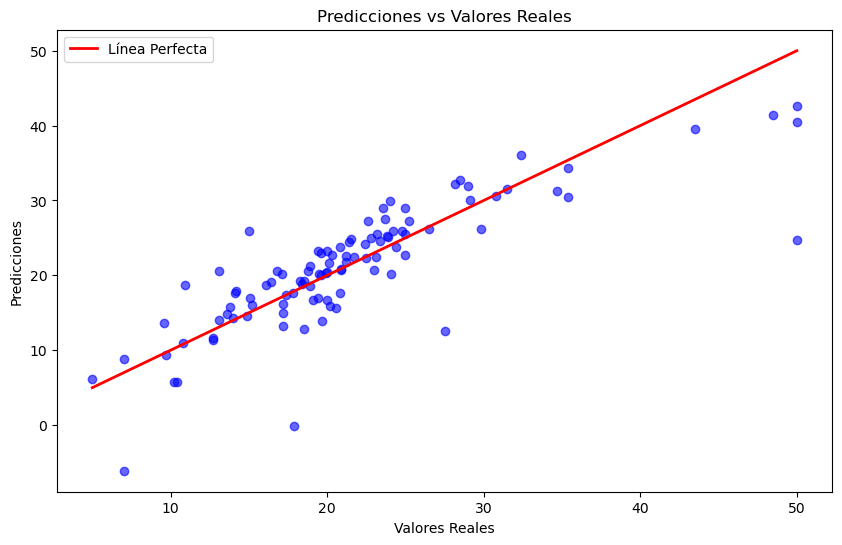

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Cargar el conjunto de datos de Boston desde la fuente original
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep= r"\s+", skiprows=22, header=None)

# Procesar los datos
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Crear DataFrame
df = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
df['PRICE'] = target

display(df)

# Análisis exploratorio de datos (EDA)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['RM'], y=df['PRICE'])
plt.title('Relación entre Número de Habitaciones y Precio de la Vivienda')
plt.xlabel('Número de Habitaciones (RM)')
plt.ylabel('Precio de la Vivienda (PRICE)')
plt.show()

# Dividir el conjunto de datos
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.2f}')

# Gráfico de regresión para una sola característica (RM)
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['RM'], y=y_test, marker='o', label='Datos Reales', color='blue')
plt.scatter(X_test['RM'], y_pred, color='red', label='Predicciones', alpha=0.5)
plt.title('Predicciones de Precio de Vivienda vs Número de Habitaciones')
plt.xlabel('Número de Habitaciones (RM)')
plt.ylabel('Precio de la Vivienda (PRICE)')
plt.legend()
plt.show()

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Línea Perfecta')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


# Optimización del modelo con regulación (Ridge y Lasso)

In [2]:
# Iniciar los modelos base:
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)

#Definir la parrilla de hiperparametros alpha:
param_grid = {
    'alpha':[0.001,0.01,0.1,1,10,100]
}


In [3]:
#Leer documento

print("----Inicializando la busquedad de hiperparametros------") 

grid_search_ridge= GridSearchCV(
    estimator = ridge_model,
    param_grid = param_grid,
    cv = 5,
    scoring = "neg_mean_squared_error", 
    n_jobs = -1,
    verbose = 1
)

#Entrenamos los nuevos hiperparametros:
grid_search_ridge.fit(X_train,y_train)

best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

print(f'Mejores hiperparametros para Ridge: {best_params_ridge}')
print(f'Mejor MSE (Validacción Cruzada) para Ridge: {-grid_search_ridge.best_score_:.2f}')


----Inicializando la busquedad de hiperparametros------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparametros para Ridge: {'alpha': 0.001}
Mejor MSE (Validacción Cruzada) para Ridge: 23.65


In [4]:
# Iniciar los modelos base:
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)

#Definir la parrilla de hiperparametros alpha:
param_grid = {
    'alpha':[0.001,0.01,0.1,1,10,100]}

In [5]:
#Leer documento

print("----Inicializando la busquedad de hiperparametros------") 

grid_search_lasso= GridSearchCV(
    estimator = lasso_model,
    param_grid = param_grid,
    cv = 5,
    scoring = "neg_mean_squared_error", 
    n_jobs = -1,
    verbose = 1
)

#Entrenamos los nuevos hiperparametros:
grid_search_lasso.fit(X_train,y_train)

best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print(f'Mejores hiperparametros para Lasso: {best_params_ridge}')
print(f'Mejor MSE (Validacción Cruzada) para Lasso: {-grid_search_lasso.best_score_:.2f}')


----Inicializando la busquedad de hiperparametros------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparametros para Lasso: {'alpha': 0.001}
Mejor MSE (Validacción Cruzada) para Lasso: 23.66


# Comparar y seleccionar el mejor modelo:

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

#predicciones con el modelo linearRegression:
y_lr_predict = lr_model.predict(X_test)

#Metricas del modelo
mse_lr = mean_squared_error(y_test,y_lr_predict)
r2_lr = r2_score(y_test,y_lr_predict)


#Evaluar el modelo Ridge:
y_ridge_predict = best_model_ridge.predict(X_test)

#Metricas del modelo:
mse_ridge = mean_squared_error(y_test, y_ridge_predict)
r2_ridge = r2_score(y_test,y_ridge_predict)

# Evaluar el modelo Ridge:
y_lasso_predict = best_model_lasso.predict(X_test)

#Metricas del modelo lasso
mse_lasso = mean_squared_error(y_test,y_lasso_predict)
r2_lasso = r2_score(y_test,y_lasso_predict)

print("\nResultados de metricas de Regresión Lineal(Normal, sin Regulación) ")
print(f"MSE: \t{mse_lr:.2f}")
print(f"R2_score: \t{r2_lr:.2f}")

print("\nResultados de metricas de Ridge ")
print(f"MSE: \t{mse_ridge:.2f}")
print(f"R2_score: \t{r2_ridge:.2f}")

print("\nResultados de metricas de Lasso ")
print(f"MSE: \t{mse_lasso:.2f}")
print(f"R2_score: \t{r2_lasso:.2f}")





Resultados de metricas de Regresión Lineal(Normal, sin Regulación) 
MSE: 	24.29
R2_score: 	0.67

Resultados de metricas de Ridge 
MSE: 	24.29
R2_score: 	0.67

Resultados de metricas de Lasso 
MSE: 	24.29
R2_score: 	0.67


# Escoger el mejor modelo

In [7]:
models_performance = { 
    'LinearRegression' : r2_lr,
    'Ridge': r2_ridge,
    'Lasso': r2_lasso
}

best_model_name = max(models_performance, key = models_performance.get)
print(best_model_name)

if best_model_name == 'LinearRegression':
    final_model_regression = lr_model
elif best_model_name == 'Ridge':
    final_model_regression = best_model_ridge
else:
    final_model_regression = best_model_lasso

Lasso


# Guardar el mejor modelo

In [8]:
model_file_name = './Modelos/best_model_rl_lss.pkl'
joblib.dump(final_model_regression,model_file_name)

['./Modelos/best_model_rl_lss.pkl']

# Imprimir gráficos resultantes

# Función de predicción

In [12]:
# importamos librerias:
import joblib
import pandas as pd
import numpy as np

MODEL_PATH = './Modelos/best_model_rl_lss.pkl'

try:
    loaded_model = joblib.load(MODEL_PATH)
    print("Modelo cargado exitosamente")
except Exception as e:
    print(f"No se ha podido cargar el modelo de regresión Lineal:\n {e}")

MODEL_FEATURES = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]


# Función para predecir:

def predecir_precio_vivienda(input_data: dict, real_price:float = None):
    if loaded_model is None:
        return {
            "error":"El modelo no está cargado"
        }
    try:
        input_df = pd.DataFrame([input_data],columns = MODEL_FEATURES)
    except keyError as e:
        return {
            "msj":"Faltan caracteristicas en el dataframe, o sus nombres son incorrectos.",
            "error":e
        }
    
    except Exception as e:
        return {
            "msj":"No se puede crear el dataframe",
            "error": e
        }
    #Realizar la predicción:
    prediccion = loaded_model.predict(input_df)[0]

    resultado = {
        "valor predicho":float(prediccion)
    }

    if real_price is not None:
        resultado['valor real'] = real_price
        resultado['diferencia'] = float(abs(prediccion -real_price))
    
    return resultado
    

    
        

    

Modelo cargado exitosamente


In [13]:
display(df)
data_test = {
     "CRIM" : 0.05,     
 "ZN" : 20,       
 "INDUS":3.0,
 "CHAS" :0.0,
 "NOX": 0.5,      
 "RM": 7.0,
 "AGE": 30, 
 "DIS" : 4.0, 
 "RAD" : 3.0,
 "TAX" : 250.0,
 "PTRATIO":18.0,
 "B" :390.0,
 "LSTAT": 5.0
}

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
print(predecir_precio_vivienda(data_test,35.0))

{'valor predicho': 31.394158908225027, 'valor real': 35.0, 'diferencia': 3.6058410917749733}


In [17]:
display(df)
data_test = {
     "CRIM" : 0.00632,     
 "ZN" : 18,       
 "INDUS":2.31,
 "CHAS" :0.0,
 "NOX": 0.538,      
 "RM": 6.575,
 "AGE": 65.2, 
 "DIS" : 4.09, 
 "RAD" : 1.0,
 "TAX" : 296.0,
 "PTRATIO":15.3,
 "B" :396.90,
 "LSTAT": 4.98
}

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
print(predecir_precio_vivienda(data_test,24.0))

{'valor predicho': 29.96727708690984, 'valor real': 24.0, 'diferencia': 5.967277086909839}


In [18]:
data_test = {
     "CRIM" : 0.06905,     
 "ZN" : 0.0,       
 "INDUS":2.18,
 "CHAS" :0.0,
 "NOX": 0.458,      
 "RM": 7.147,
 "AGE": 54.2, 
 "DIS" : 6.0622, 
 "RAD" : 3.0,
 "TAX" : 222.0,
 "PTRATIO":18.7,
 "B" :396.90,
 "LSTAT": 5.33
}

In [19]:
print(predecir_precio_vivienda(data_test,36.2))

{'valor predicho': 28.562381239888165, 'valor real': 36.2, 'diferencia': 7.637618760111838}
